In [ ]:
!pip install peartree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cchardet: filename=cchardet-2.1.7-cp310-cp310-linux_x86_64.whl size=261586 sha256=04ce9a54cd27ddf8119b63b7cfae96742d2c881e15ef258a16ef2242a6921e96
  Stored in directory: /root/.cache/pip/wheels/ee/e0/ab/e01326f15c59438d080b1496dbab8091e952ec72f35e3c437e
Successfully built cchardet


In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import peartree as pt
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import numpy as np
import os
import pandas as pd
%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/GTFS/Local_Transit'

In [85]:
#Function to filter cities based on stop names
def filter_network(gtfs_path, city_stops):
    filtered_network = {}

    for file_name in os.listdir(path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(path, file_name)
            df = pd.read_csv(file_path)

            if 'stop_id' in df.columns:
                filtered_df = df[df['stop_id'].isin(city_stops)]
            elif 'route_id' in df.columns:
                filtered_df = df[df['route_id'].isin(city_stops)]

            filtered_network[file_name] = filtered_df

    return filtered_network

def build_transit_graph(data):
    graph = nx.DiGraph()

    if 'trips.txt' in data:
      for stop_times_row in data['stop_times.txt'].itertuples():
          trip_id = stop_times_row.trip_id
          stop_id = stop_times_row.stop_id

          graph.add_node(stop_id)

          trip_df = data['trips.txt']
          if trip_id in trip_df['trip_id'].values:
              trip_row = trip_df[trip_df['trip_id'] == trip_id].iloc[0]
              route_id = trip_row.route_id

              # Add the edge with a default weight of 1
              if graph.has_edge(stop_id, route_id):
                  graph[stop_id][route_id]['weight'] += 1
              else:
                  graph.add_edge(stop_id, route_id, weight=1)

    return graph

In [86]:
city_names = ['Aachen', 'Berlin', 'Frankfurt', 'Hamburg', 'Leipzig']

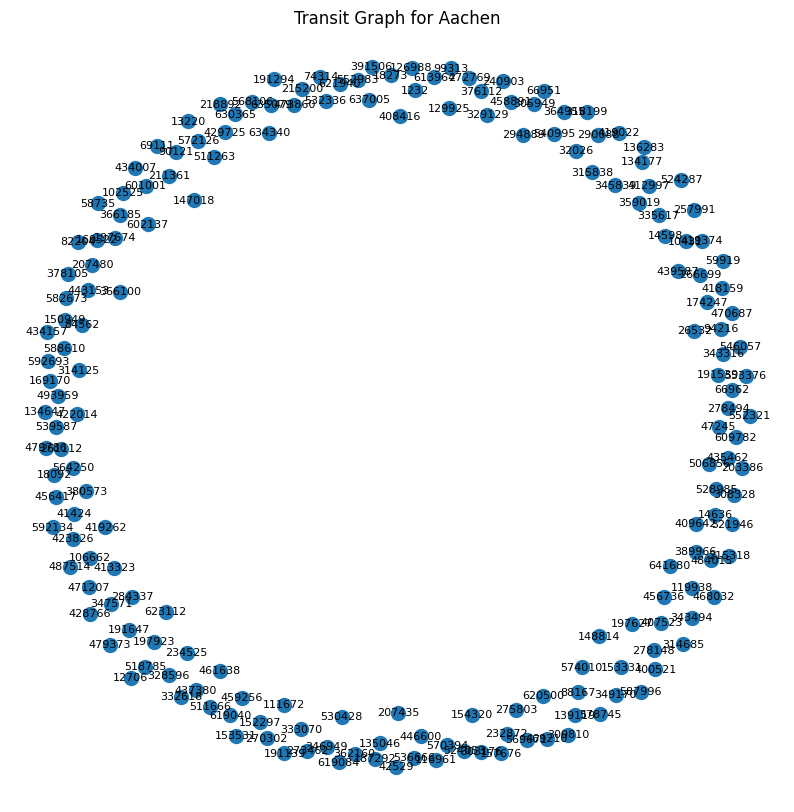

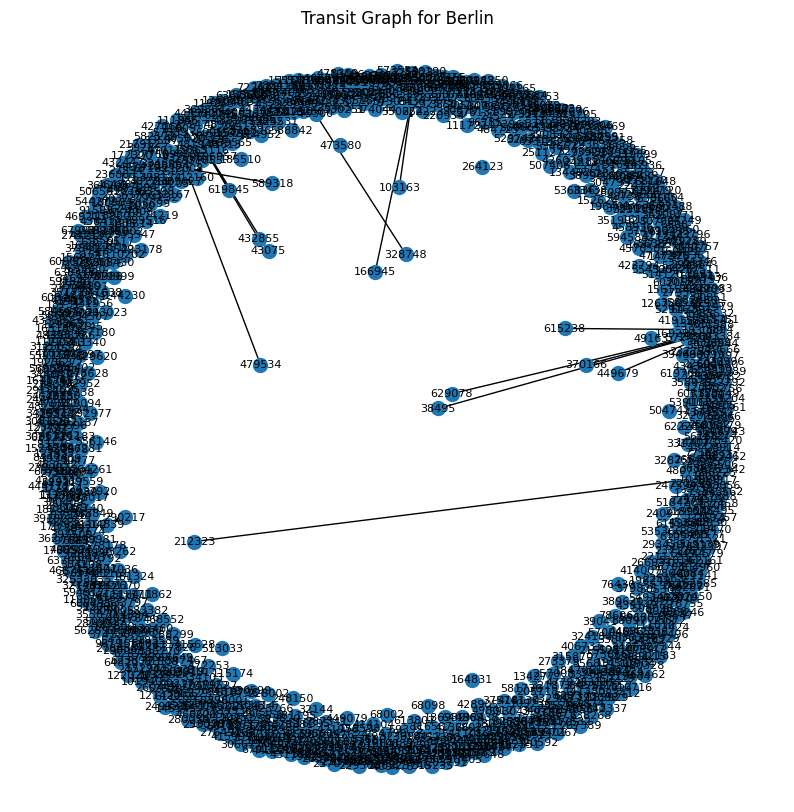

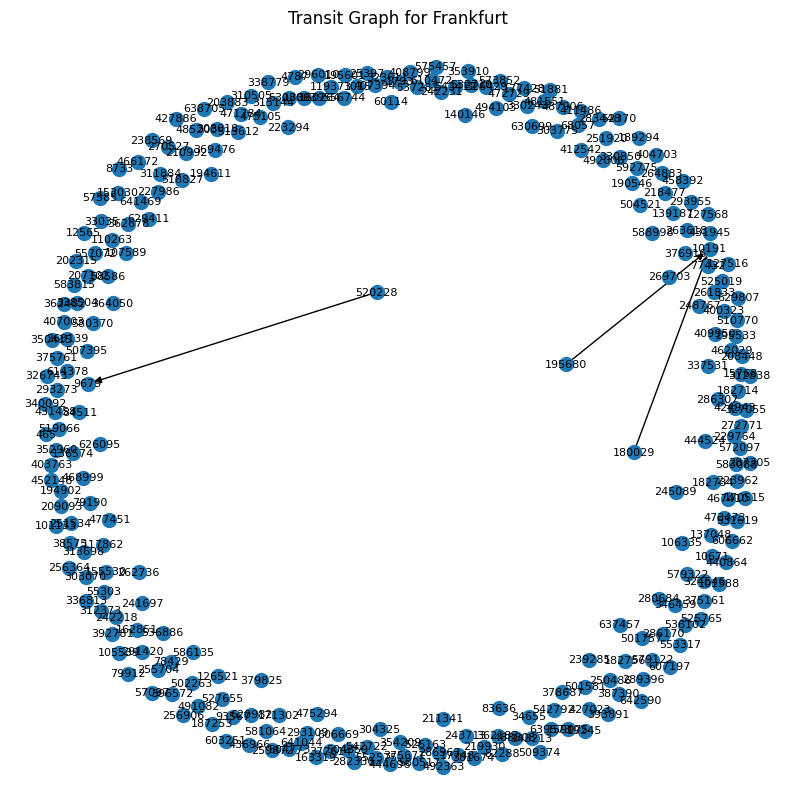

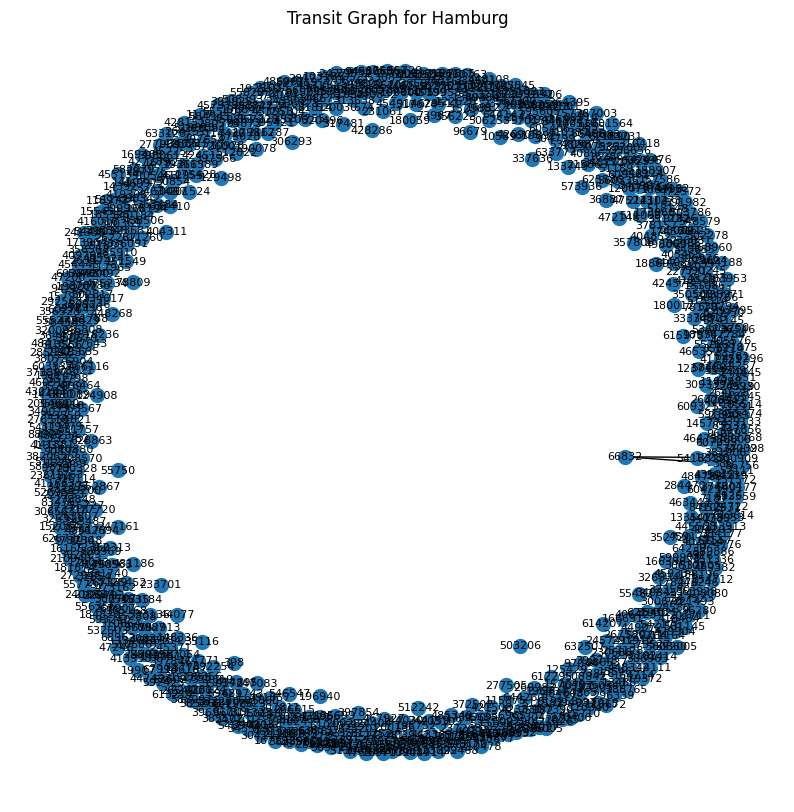

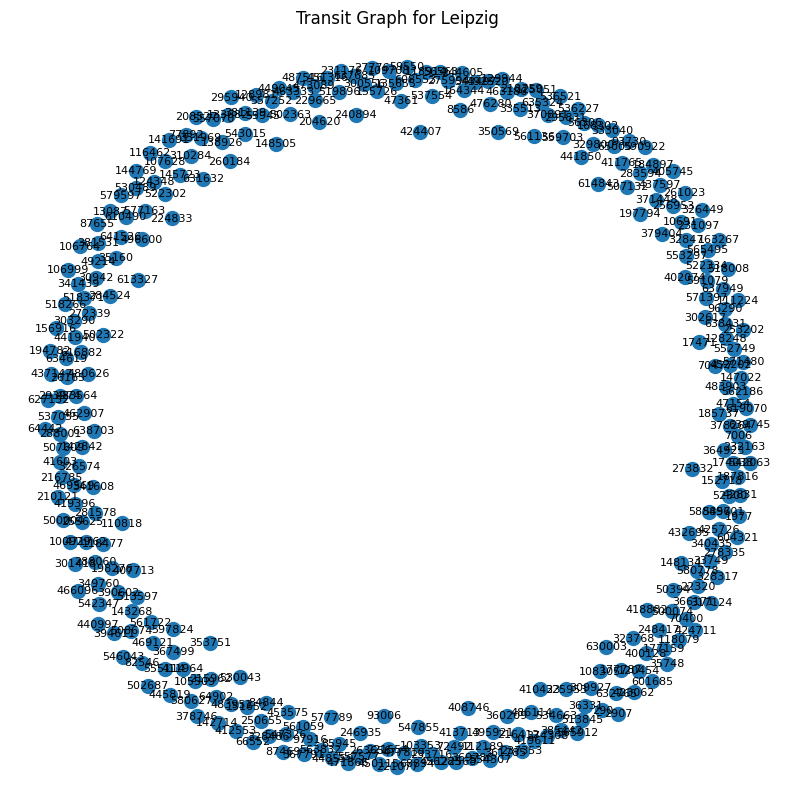

In [87]:
for city_name in city_names:
    # Getting stop ids from stops.txt
    stops_df = pd.read_csv(os.path.join(path, 'stops.txt'))
    city_stops = stops_df[stops_df['stop_name'].str.contains(city_name, case=False)]['stop_id'].tolist()

    # Apply filter function
    filtered_network = filter_network(path, city_stops)

    transit_graph = build_transit_graph(filtered_network)

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(transit_graph, k=0.5)
    nx.draw_networkx(transit_graph, pos, with_labels=True, node_size=100, font_size=8)
    plt.title(f"Transit Graph for {city_name}")
    plt.axis('off')
    plt.show()